## Neural Network

The **neural network** python scratch is trained using a dataset of images, where each image is preprocessed, flattened into a vector, and normalized before being fed into the network.

### Implementation details:

Image Preprocessing


- Each image is resized to a fixed size of 32x32 pixels.
- The images are converted to grayscale to simplify the input data.
- Pixel values are normalized to a range of (0, 1) to facilitate learning.

#### Import required libraries

In [ ]:
import numpy as np
import os

In [ ]:
from PIL import Image

In [ ]:
import matplotlib.pyplot as plt

### Loading and preprocessing

In [ ]:

def load_dataset(target_size=(32, 32), grayscale=True):

  # -> modify path name
  path_name = '/content/drive/MyDrive/Datasets/data_dir'
  images = []
  labels = []
  classes = []

  folder_path = sorted(os.listdir(path_name))
  for index_label, folders in enumerate(folder_path):
    classes.append(folders)
    class_path = os.path.join(path_name, folders)

    for file_name in os.listdir(class_path):
      img_path = os.path.join(class_path, file_name)
      img = Image.open(img_path)
      img = img.resize(target_size)

      if grayscale:
        img = img.convert("L")

      images.append(np.array(img))
      labels.append(index_label)

  return np.array(images), np.array(labels), classes

In [ ]:
img, label, class_ = load_dataset()

In [ ]:
print(f'Loaded {len(img)} images with {len(class_)} classes.')

Loaded 8 images with 4 classes.


### Display preprocess image

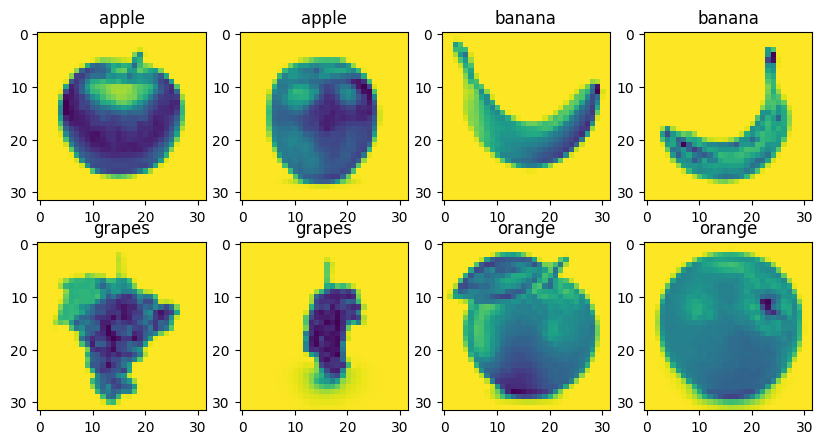

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

for index, ax in enumerate(axes.flat):
  ax.imshow(img[index])
  ax.set_title(class_[label[index]])

plt.tight_layout
plt.show()

see train classification image in [Github classes folder](https://github.com/christiangarcia0311/machine-learning-algorithm/tree/main/classes)

### Neural Network Architecture

In [ ]:

# base layer
class Layer:
  def __init__(self):
    self.inputs = None
    self.output = None
  def forward(self, inputs):
    pass

  def backward(self, output_gradient, learning_rate):
    pass

# dense layer
class DenseLayer(Layer):
  def __init__(self, input_size, output_size):
    self.weights = np.random.randn(output_size, input_size)
    self.bias = np.random.randn(output_size, 1)

  def forward(self, inputs):
    self.inputs = inputs
    return np.dot(self.weights, self.inputs) + self.bias

  def backward(self, output_gradient, learning_rate):
    weights_gradient = np.dot(output_gradient, self.inputs.T)
    self.weights -= learning_rate * weights_gradient
    self.bias -= learning_rate * np.sum(output_gradient, axis=1, keepdims=True)
    return np.dot(self.weights.T, output_gradient)

# activation layer
class Activation(Layer):
  def __init__(self, activation, activation_prime):
    self.activation = activation
    self.activation_prime = activation_prime

  def forward(self, inputs):
    self.inputs = inputs
    return self.activation(self.inputs)

  def backward(self, output_gradient, learning_rate):
    return np.multiply(output_gradient, self.activation_prime(self.inputs))

# tan-h function activation layer
class TanH(Activation):
  def __init__(self):
    tanh = lambda n: np.tanh(n)
    tanh_prime = lambda n: 1 - np.tanh(n) ** 2
    super().__init__(tanh, tanh_prime)

In [ ]:
# error loss
def mse(y_true, y_pred):
  return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
  return 2 * (y_pred - y_true) / np.size(y_true)

# accuracy
def accuracy(y_true, y_pred):
  y_true_ = np.argmax(y_true, axis=0)
  y_pred_ = np.argmax(y_pred, axis=0)
  return np.mean(y_true_ == y_pred_)

In [ ]:
np.random.seed(42)

### Load and train preprocess data

In [ ]:

def load_data(image_size=(32, 32)):
  path_name = '/content/drive/MyDrive/Datasets/data_dir'
  images = []
  labels = []
  classes = []

  for index_label, dataset_folder in enumerate(os.listdir(path_name)):
    paths = os.path.join(path_name, dataset_folder)

    if os.path.isdir(paths):
      classes.append(dataset_folder)
      for file_name in os.listdir(paths):
        img_path = os.path.join(paths, file_name)
        img = Image.open(img_path).convert("L")
        img = img.resize(image_size)

        # -> to normalize pixel values
        img = np.array(img) / 255.0

        images.append(img.flatten())
        labels.append(index_label)

  return np.array(images).T, np.array(labels).reshape(1, -1), classes

### Train model

In [ ]:
img, label, class_ = load_data()

In [ ]:
# -> encode labels
num_class = len(class_)
oh_labels = np.zeros((num_class, label.shape[1]))

for n, lb in enumerate(label[0]):
  oh_labels[lb, n] = 1

In [ ]:
# -> define ann architecture
network = [
    DenseLayer(img.shape[0], 32),
    TanH(),
    DenseLayer(32, num_class),
    TanH()
]

In [ ]:

# -> training parameters
epochs = 1000
learning_rate = 0.01

for epoch in range(epochs):

  # forward
  output = img
  for layer in network:
    output = layer.forward(output)

  # error loss
  loss = mse(oh_labels, output)

  # backward
  gradient = mse_prime(oh_labels, output)
  for layer in reversed(network):
    gradient = layer.backward(gradient, learning_rate)

  if epoch % 100 == 0:
    print(f'Epoch: ({epoch} | {epochs}) ======== Loss: {loss}')

# -> evaluate
output = img
for layer in network:
  output = layer.forward(output)

train_accuracy = accuracy(oh_labels, output)
print(f'Train Accuracy: {train_accuracy:.3f}')

Epoch: (0 | 1000) ======== Loss: 0.6856858640171541
Epoch: (100 | 1000) ======== Loss: 0.6511885926550658
Epoch: (200 | 1000) ======== Loss: 0.6504994336631549
Epoch: (300 | 1000) ======== Loss: 0.6494395758971786
Epoch: (400 | 1000) ======== Loss: 0.6472072667875247
Epoch: (500 | 1000) ======== Loss: 0.6353168389675616
Epoch: (600 | 1000) ======== Loss: 0.5929666053636815
Epoch: (700 | 1000) ======== Loss: 0.5910603512435062
Epoch: (800 | 1000) ======== Loss: 0.5739312102647176
Epoch: (900 | 1000) ======== Loss: 0.5604480003732999
Train Accuracy: 0.375


train accuracy still low we need to recreate the code structure for better performance.

Changes:

- Weight Initialization -> uses `He` initialization  for weights in `Dense Layer`.
- Activation Function -> using `ReLu` function instead of `Tanh` and `Softmax` for the output layer.
- Loss Function -> using cross-entropy loss instead of mse by calculating loss error.

### Modified Neural Network Architecture

In [ ]:
# base layer
class Layer:
  def __init__(self):
    self.inputs = None
    self.output = None
  def forward(self, inputs):
    pass

  def backward(self, output_gradient, learning_rate):
    pass

# dense layer
class DenseLayer(Layer):
  def __init__(self, input_size, output_size):
    # `He` weight initialization
    self.weights = np.random.randn(output_size, input_size) * np.sqrt(2. / input_size)
    self.bias = np.zeros((output_size, 1))

  def forward(self, inputs):
    self.inputs = inputs
    return np.dot(self.weights, self.inputs) + self.bias

  def backward(self, output_gradient, learning_rate):
    weights_gradient = np.dot(output_gradient, self.inputs.T)
    self.weights -= learning_rate * weights_gradient
    self.bias -= learning_rate * np.sum(output_gradient, axis=1, keepdims=True)
    return np.dot(self.weights.T, output_gradient)

# activation layer
class Activation(Layer):
  def __init__(self, activation, activation_prime):
    self.activation = activation
    self.activation_prime = activation_prime

  def forward(self, inputs):
    self.inputs = inputs
    return self.activation(self.inputs)

  def backward(self, output_gradient, learning_rate):
    return np.multiply(output_gradient, self.activation_prime(self.inputs))

# relu function activation
class ReLu(Activation):
  def __init__(self):
    relu = lambda n: np.maximum(0, n)
    relu_prime = lambda n: (n > 0).astype(float)
    super().__init__(relu, relu_prime)

# softmax function activation
class SoftMax(Layer):
  def forward(self, inputs):
    self.inputs = inputs
    exponent_values = np.exp(inputs - np.max(inputs, axis=0, keepdims=True))
    return exponent_values / np.sum(exponent_values, axis=0, keepdims=True)

  def backward(self, output_gradient, learning_rate):
    return output_gradient

In [ ]:
# error loss
def cross_entropy(y_true, y_pred):
  samples = y_pred.shape[1]
  y_pred_clip = np.clip(y_pred, 1e-12, 1 - 1e-12)
  correct_conf = np.sum(y_true * np.log(y_pred_clip), axis=0)
  return -np.sum(correct_conf) / samples

def cross_entropy_prime(y_true, y_pred):
  samples = y_pred.shape[1]
  return - (y_true - y_pred) / samples

def accuracy(y_true, y_pred):
  y_true_ = np.argmax(y_true, axis=0)
  y_pred_ = np.argmax(y_pred, axis=0)
  return np.mean(y_true_ == y_pred_)

In [ ]:
np.random.seed(42)

### Train model

In [ ]:
imgs, lbs, cls = load_data()

In [ ]:
# -> encode labels
n_class = len(cls)
one_hot = np.zeros((n_class, lbs.shape[1]))

for n, lb in enumerate(lbs[0]):
  one_hot[lb, n] = 1

In [ ]:
# -> define ann network
network_ = [
    DenseLayer(imgs.shape[0], 128),
    ReLu(),
    DenseLayer(128, 64),
    ReLu(),
    DenseLayer(64, n_class),
    SoftMax()
]

In [ ]:

# -> training parameters
epochs_ = 1000
learning_rate_ = 0.01

for epoch in range(epochs_):

  # forward
  outputs = imgs
  for layer in network_:
    outputs = layer.forward(outputs)

  # error loss
  loss_ = cross_entropy(one_hot, outputs)

  # backward
  gradient_ = cross_entropy_prime(one_hot, outputs)
  for layer in reversed(network_):
    gradient_ = layer.backward(gradient_, learning_rate_)

  if epoch % 100 == 0:
    print(f'Epoch: ({epoch} | {epochs_}) ======== Loss: {loss_}')

# -> evaluate
outputs = imgs
for layer in network_:
  outputs = layer.forward(outputs)

train_acc = accuracy(one_hot, outputs)
print(f'Train Accuracy: {train_acc:.3f}')

Epoch: (0 | 1000) ======== Loss: 0.004628954723219418
Epoch: (100 | 1000) ======== Loss: 0.004069505360727487
Epoch: (200 | 1000) ======== Loss: 0.0036209968386121155
Epoch: (300 | 1000) ======== Loss: 0.003254216534540403
Epoch: (400 | 1000) ======== Loss: 0.0029495807089366093
Epoch: (500 | 1000) ======== Loss: 0.0026926639835109364
Epoch: (600 | 1000) ======== Loss: 0.00247345609303936
Epoch: (700 | 1000) ======== Loss: 0.0022846330997222143
Epoch: (800 | 1000) ======== Loss: 0.0021205457755275343
Epoch: (900 | 1000) ======== Loss: 0.0019767702042326595
Train Accuracy: 1.000


### Test Sample image

In [ ]:
# -> preprocess single image
def preprocess_data(img_path, img_size=(32, 32)):
  img = Image.open(img_path).convert("L")
  img = img.resize(img_size)
  img = np.array(img) / 255.0

  return img, img.flatten().reshape(-1, 1)

In [ ]:
# -> predict image
def predict(img_path, network, classes):
  _, img_flat = preprocess_data(img_path)
  output = img_flat
  for layer in network:
    output = layer.forward(output)
    predicted_class = np.argmax(output, axis=0)

  return classes[predicted_class[0]]

In [ ]:
# -> sample image
sample_image_path = '/content/drive/MyDrive/Datasets/testing_data/test3.jpeg'

In [ ]:
prediction = predict(sample_image_path, network_, cls)
print(f'Predicted class for sample image is: {prediction}')
acc = accuracy(one_hot, outputs)

Predicted class for sample image is: grapes


### Visualize sample image

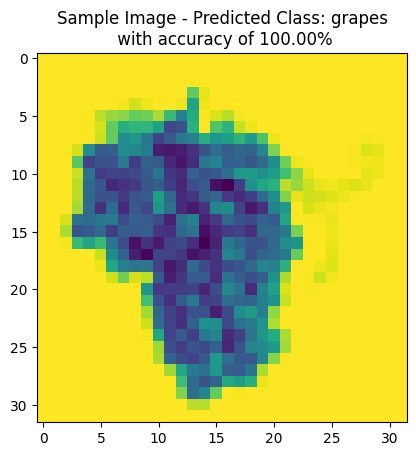

In [ ]:
test, preprocess_img = preprocess_data(sample_image_path)

plt.imshow(test)
plt.title(f'Sample Image - Predicted Class: {prediction}\n with accuracy of {acc*100:.2f}%')
plt.show()

follow: [Github](https://github.com/christiangarcia0311)